<a href="https://colab.research.google.com/github/matheusglima/Python_Investing/blob/master/API_Banco_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Obtendo dados da API do Banco Central

In [0]:
def consulta(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [4]:
ipca = consulta(433)
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2019-12-01,1.15
2020-01-01,0.21
2020-02-01,0.25


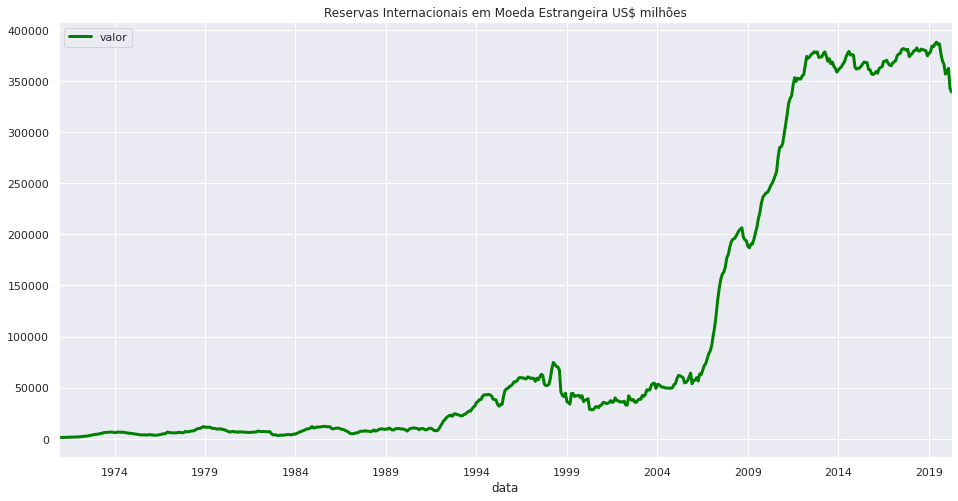

In [5]:
reservas_internacionais = consulta(3546)
reservas_internacionais.plot(figsize=(16, 8), linewidth=3, color='green', title='Reservas Internacionais em Moeda Estrangeira US$ milhões')


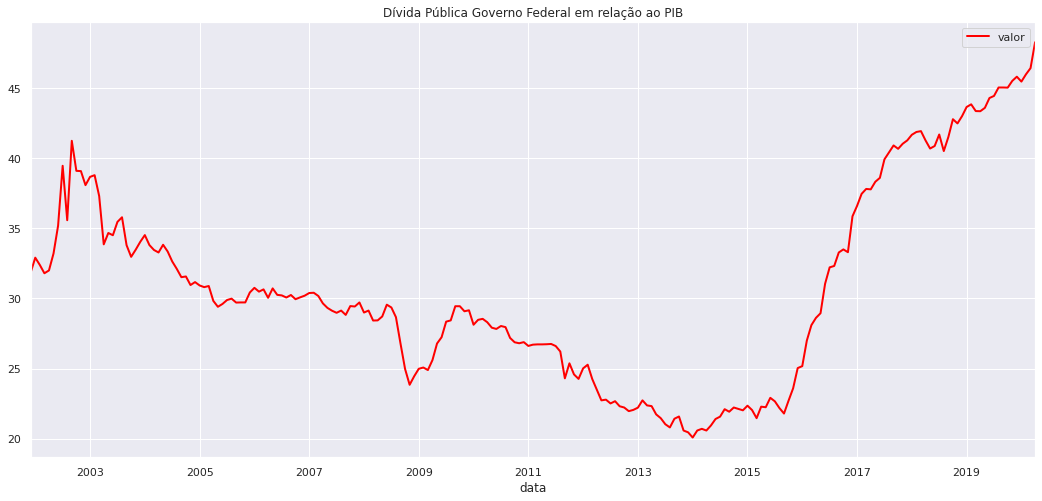

In [0]:
div_pub_governo_federal = consulta(4504)
div_pub_governo_federal.plot(figsize=(18, 8), linewidth=2, color='Red', title='Dívida Pública Governo Federal em relação ao PIB')

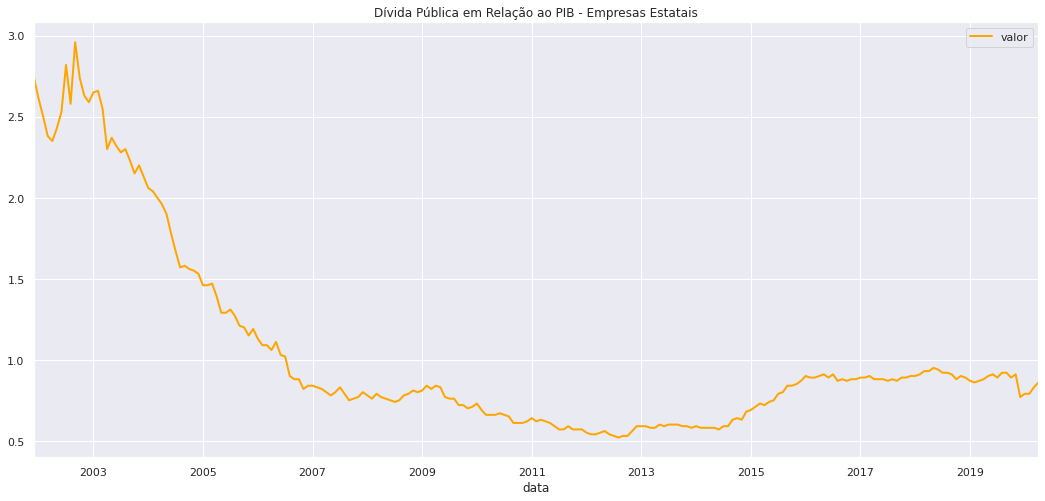

In [0]:
div_pub_emp_estatais = consulta(4509)
div_pub_emp_estatais.plot(figsize=(18, 8), linewidth=2, color='orange', title='Dívida Pública em Relação ao PIB - Empresas Estatais')

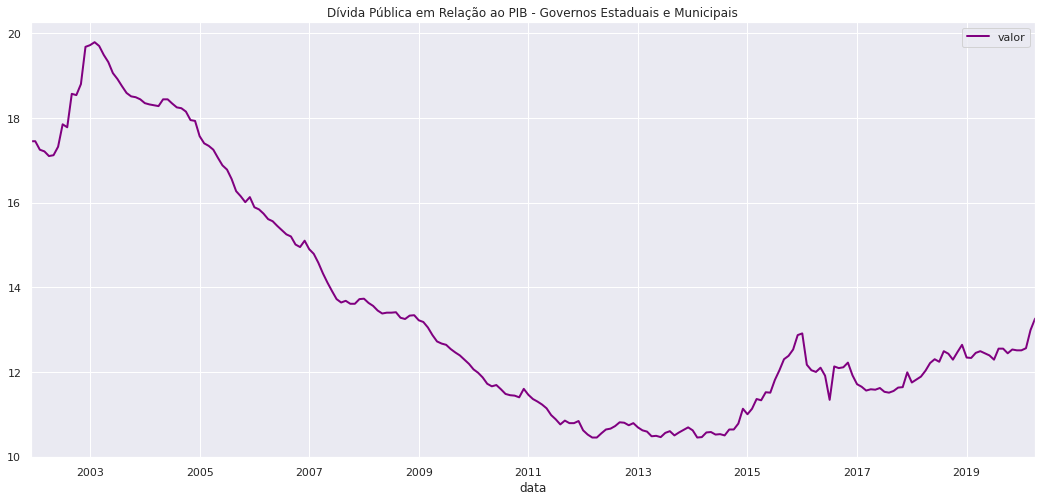

In [0]:
div_pub_gov_est_mun = consulta(4506)
div_pub_gov_est_mun.plot(figsize=(18, 8), linewidth=2, color='purple', title='Dívida Pública em Relação ao PIB - Governos Estaduais e Municipais')

In [0]:
div_pub_gov_est_mun

,valor
data,
2001-12-01,17.45
2002-01-01,17.45
2002-02-01,17.25
2002-03-01,17.21
2002-04-01,17.10
...,...
2019-12-01,12.51
2020-01-01,12.51
2020-02-01,12.56


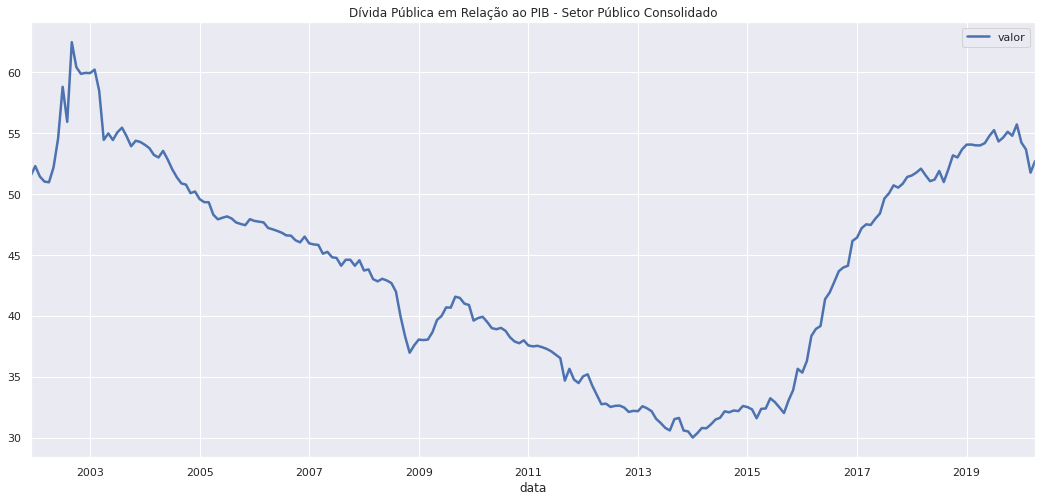

In [0]:
div_pub_set_pub = consulta(4513)
div_pub_set_pub.plot(figsize=(18, 8), linewidth=2.5, title='Dívida Pública em Relação ao PIB - Setor Público Consolidado')

In [0]:
div_pub_set_pub

,valor
data,
2001-12-01,51.49
2002-01-01,52.28
2002-02-01,51.43
2002-03-01,51.01
2002-04-01,50.95
...,...
2019-12-01,55.70
2020-01-01,54.21
2020-02-01,53.65


In [0]:
cdi = consulta(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2020-05-26,0.011345
2020-05-27,0.011345
2020-05-28,0.011345


# CDI vs IBOV



In [6]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9d13ca6ed6981df04e91af91fb449ded577f53648781afe770854e8f1b9fdb46
  Stored in directory: /tmp/pip-ephem-wheel-cache-g6a_nwzt/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [7]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]
ibov

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2020-05-28,86949.000000
2020-05-29,87403.000000
2020-06-01,88620.000000


In [0]:
data_inicio = '2015-01-01'

In [8]:
ibov_retorno = ibov.pct_change()
ibov_retorno

,Adj Close
Date,
1993-04-27,NaN
1993-04-28,-0.008163
1993-04-29,-0.024691
1993-04-30,0.016878
1993-05-03,0.000000
...,...
2020-05-28,-0.011337
2020-05-29,0.005221
2020-06-01,0.013924


In [17]:
ibov_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_acumulado.iloc[0] = 1
ibov_acumulado

,Adj Close
Date,
2015-01-02,1.000000
2015-01-05,0.950207
2015-01-06,0.959886
2015-01-07,0.989122
2015-01-08,0.998720
...,...
2020-05-28,1.738737
2020-05-29,1.747815
2020-06-01,1.772152


In [11]:
cdi = consulta(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2020-05-27,0.011345
2020-05-28,0.011345
2020-05-29,0.011345


In [18]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1
cdi_acumulado

,valor
data,
2015-01-02,1.000000
2015-01-05,1.000869
2015-01-06,1.001304
2015-01-07,1.001739
2015-01-08,1.002175
...,...
2020-05-27,1.624426
2020-05-28,1.624611
2020-05-29,1.624795


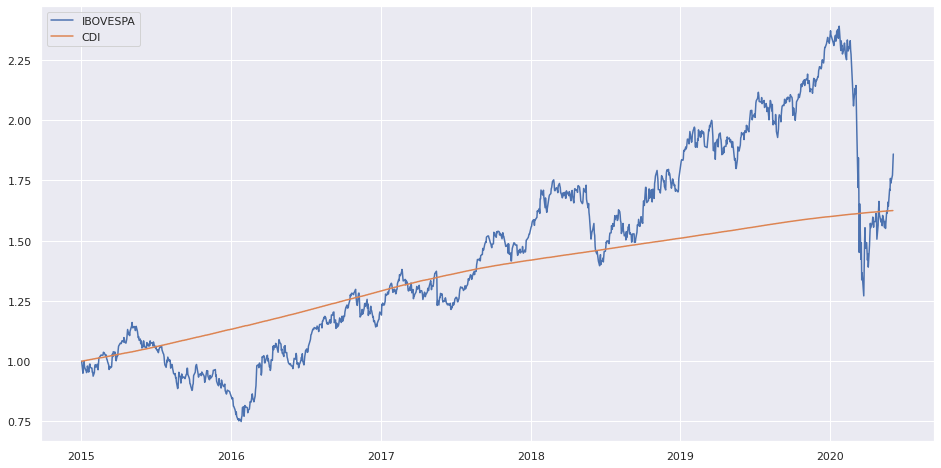

In [23]:
fig, ax = plt.subplots()
ax.plot(ibov_acumulado, label='IBOVESPA')
ax.plot(cdi_acumulado, label='CDI')
plt.legend()